### Since this dataset follows a panel-logging structure (multiple devices recorded at fixed 15-minute intervals across multiple homes), time-dependent features such as lag values and rolling averages are computed on the cleaned, continuous dataset before normalization and splitting. This preserves the temporal sequence within each home–device combination and avoids disrupting time-based relationships. The normalization and train–test split steps from Milestone 1 are retained in previous notebook and will be performed again for dataset after feature engineering.

In [1]:
import joblib       # to load saved preprocessed dataframe

df = joblib.load('../saved_objects/df_cleaned.joblib')
df

,home_id,timestamp,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,day_of_week,hour_of_day,energy_kWh
0,1,2022-01-01 00:00:00,air_conditioner,bedroom,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,5,0,0.000000
1,1,2022-01-01 00:00:00,light,living_room,on,105.880000,1,sleeping,11.4,11.9,45.2,73.4,5,0,0.026470
2,1,2022-01-01 00:00:00,tv,living_room,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,5,0,0.000000
3,1,2022-01-01 00:00:00,fridge,kitchen,on,223.460000,1,sleeping,11.4,11.9,45.2,73.4,5,0,0.055865
4,1,2022-01-01 00:00:00,washer,laundry_room,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,5,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751995,10,2022-12-31 23:45:00,air_conditioner,bedroom,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,5,23,0.000000
1751996,10,2022-12-31 23:45:00,light,living_room,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,5,23,0.000000
1751997,10,2022-12-31 23:45:00,tv,living_room,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,5,23,0.000000
1751998,10,2022-12-31 23:45:00,fridge,kitchen,on,261.350000,1,sleeping,10.8,11.1,68.0,45.5,5,23,0.065338


In [2]:
df.columns

Index(['home_id', 'timestamp', 'device_type', 'room', 'status', 'power_watt',
       'user_present', 'activity', 'indoor_temp', 'outdoor_temp', 'humidity',
       'light_level', 'day_of_week', 'hour_of_day', 'energy_kWh'],
      dtype='object')

#### Module 3.1: Extract relevant time-based features (hour, day, week, month trends).
##### since the columns day_of_week, and hour_of day already exist in dataframe for houly, daily and weekly trends, introducing new column 'month_of_year' for monthly trend

In [3]:
df['month_of_year'] = df['timestamp'].dt.month
col = df.pop('month_of_year')
df.insert(len(df.columns) - 3, 'month_of_year', col)
df

,home_id,timestamp,device_type,room,status,power_watt,user_present,activity,indoor_temp,outdoor_temp,humidity,light_level,month_of_year,day_of_week,hour_of_day,energy_kWh
0,1,2022-01-01 00:00:00,air_conditioner,bedroom,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,1,5,0,0.000000
1,1,2022-01-01 00:00:00,light,living_room,on,105.880000,1,sleeping,11.4,11.9,45.2,73.4,1,5,0,0.026470
2,1,2022-01-01 00:00:00,tv,living_room,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,1,5,0,0.000000
3,1,2022-01-01 00:00:00,fridge,kitchen,on,223.460000,1,sleeping,11.4,11.9,45.2,73.4,1,5,0,0.055865
4,1,2022-01-01 00:00:00,washer,laundry_room,off,0.000000,1,sleeping,11.4,11.9,45.2,73.4,1,5,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751995,10,2022-12-31 23:45:00,air_conditioner,bedroom,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,12,5,23,0.000000
1751996,10,2022-12-31 23:45:00,light,living_room,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,12,5,23,0.000000
1751997,10,2022-12-31 23:45:00,tv,living_room,off,0.000000,1,sleeping,10.8,11.1,68.0,45.5,12,5,23,0.000000
1751998,10,2022-12-31 23:45:00,fridge,kitchen,on,261.350000,1,sleeping,10.8,11.1,68.0,45.5,12,5,23,0.065338


### Module 3.2: Aggregate device-level consumption statistics.

In [4]:
df.groupby(["home_id", "device_type"])["energy_kWh"].describe() # at household level

count      mean       std       min       25%  \
home_id device_type                                                        
1       air_conditioner  35040.0  0.053025  0.104930  0.000000  0.000000   
        fridge           35040.0  0.066442  0.023242  0.019378  0.055335   
        light            35040.0  0.010374  0.019251  0.000000  0.000000   
        tv               35040.0  0.044130  0.051885  0.000000  0.000000   
        washer           35040.0  0.016276  0.055588  0.000000  0.000000   
2       air_conditioner  35040.0  0.052824  0.104390  0.000000  0.000000   
        fridge           35040.0  0.066479  0.023453  0.016942  0.055285   
        light            35040.0  0.010277  0.019082  0.000000  0.000000   
        tv               35040.0  0.044294  0.051850  0.000000  0.000000   
        washer           35040.0  0.016805  0.056846  0.000000  0.000000   
3       air_conditioner  35040.0  0.032710  0.085595  0.000000  0.000000   
        fridge           35040.0  0.066426  0.023396  0.017692  0.055170   
        light            35040.0  0.010099  0.018888  0.000000  0.000000   
        tv               35040.0  0.015541  0.037331  0.000000  0.000000   
        washer           35040.0  0.012667  0.048946  0.000000  0.000000   
4       air_conditioner  35040.0  0.033918  0.087479  0.000000  0.000000   
        fridge           35040.0  0.066325  0.023121  0.016615  0.055362   
        light            35040.0  0.009895  0.018874  0.000000  0.000000   
        tv               35040.0  0.015548  0.037539  0.000000  0.000000   
        washer           35040.0  0.011247  0.046903  0.000000  0.000000   
5       air_conditioner  35040.0  0.033661  0.085979  0.000000  0.000000   
        fridge           35040.0  0.066452  0.023476  0.017962  0.055182   
        light            35040.0  0.009912  0.018905  0.000000  0.000000   
        tv               35040.0  0.015588  0.037199  0.000000  0.000000   
        washer           35040.0  0.011778  0.049009  0.000000  0.000000   
6       air_conditioner  35040.0  0.032466  0.085294  0.000000  0.000000   
        fridge           35040.0  0.066270  0.023052  0.018490  0.055245   
        light            35040.0  0.010251  0.019103  0.000000  0.000000   
        tv               35040.0  0.015429  0.037025  0.000000  0.000000   
        washer           35040.0  0.016704  0.056414  0.000000  0.000000   
7       air_conditioner  35040.0  0.032253  0.085114  0.000000  0.000000   
        fridge           35040.0  0.066246  0.023047  0.016817  0.055202   
        light            35040.0  0.010437  0.019126  0.000000  0.000000   
        tv               35040.0  0.015383  0.036908  0.000000  0.000000   
        washer           35040.0  0.016001  0.055310  0.000000  0.000000   
8       air_conditioner  35040.0  0.034845  0.088387  0.000000  0.000000   
        fridge           35040.0  0.066220  0.022992  0.018370  0.055235   
        light            35040.0  0.009765  0.018749  0.000000  0.000000   
        tv               35040.0  0.015731  0.037791  0.000000  0.000000   
        washer           35040.0  0.016681  0.056922  0.000000  0.000000   
9       air_conditioner  35040.0  0.033113  0.085348  0.000000  0.000000   
        fridge           35040.0  0.066317  0.023177  0.018040  0.055266   
        light            35040.0  0.010074  0.019014  0.000000  0.000000   
        tv               35040.0  0.015646  0.037653  0.000000  0.000000   
        washer           35040.0  0.016983  0.057622  0.000000  0.000000   
10      air_conditioner  35040.0  0.032243  0.084209  0.000000  0.000000   
        fridge           35040.0  0.066306  0.023239  0.018235  0.055203   
        light            35040.0  0.009930  0.018906  0.000000  0.000000   
        tv               35040.0  0.015288  0.037029  0.000000  0.000000   
        washer           35040.0  0.016560  0.056866  0.000000  0.000000   

                              50%       75%       max  
home_id device_typ

In [5]:
df.groupby("device_type")["energy_kWh"].describe()   # device-level

,count,mean,std,min,25%,50%,75%,max
device_type,,,,,,,,
air_conditioner,350400.0,0.037106,0.090341,0.000000,0.000000,0.000000,0.000000,0.870574
fridge,350400.0,0.066348,0.023220,0.016615,0.055245,0.062683,0.070590,0.231252
light,350400.0,0.010101,0.018991,0.000000,0.000000,0.000000,0.025065,0.148475
tv,350400.0,0.021258,0.042231,0.000000,0.000000,0.000000,0.000000,0.304831
washer,350400.0,0.015170,0.054223,0.000000,0.000000,0.000000,0.000000,0.563195


This provides an overview of device-level consumption patterns.

### Module 3.3: Create lag features and moving averages for time series learning. 

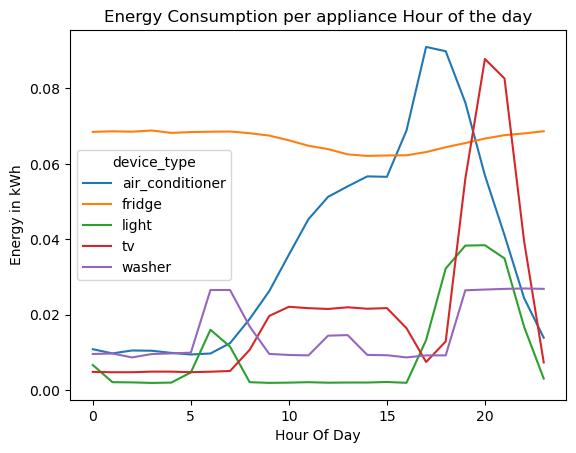

In [6]:
import os
import matplotlib.pyplot as plt

BASE_dir = os.getcwd()
FIG_PATH = os.path.abspath(BASE_dir + '/../reports/Milestone2/figures')

df_subset = df.pivot_table(index = 'hour_of_day', columns = 'device_type', values = 'energy_kWh', aggfunc='mean')
df_subset.plot(kind='line')
plt.title('Energy Consumption per appliance Hour of the day') 
plt.xlabel('Hour Of Day') 
plt.ylabel('Energy in kWh') 
plt.savefig(FIG_PATH+'\Energy_Per_Device_Hourly.png')
plt.show()

##### Since no clear repeating intra-day pattern is observed in the hourly mean energy consumption, the plots were used to guide the selection of appropriate lag intervals rather than derive explicit hourly seasonality. Consequently, lag features at 1 hour, 24 hours, and 1 week were chosen to capture short-term effects, daily context, and longer-term recurring trends observed in the time series (as seen in Milestone 1 plots).

In [7]:
 # since timestamp interval is 15 min (1hr / 4)

group_cols = ['home_id', 'device_type']

df['energy_lag_1H'] = df.groupby(group_cols)['energy_kWh'].shift(4)
df['energy_lag_1D'] = df.groupby(group_cols)['energy_kWh'].shift(24 * 4)
df['energy_lag_1W'] = df.groupby(group_cols)['energy_kWh'].shift(24 * 7 * 4)

### Rolling averages with window sizes of 1 hour, 6 hours, 12 hours, and 24 hours were computed to capture intra-day consumption trends at different temporal resolutions. These windows help smooth short-term fluctuations while preserving meaningful daily usage patterns, complementing lag-based features.

#### Weekly and monthly rolling averages were not included as they tend to over-smooth device-level consumption at a 15-minute resolution and are largely redundant with weekly lag features.

In [8]:
df['energy_roll_mean_1hr'] = df.groupby(group_cols)['energy_kWh'].rolling(window=(4)).mean().reset_index(level=group_cols, drop=True)
df['energy_roll_mean_6hr'] = df.groupby(group_cols)['energy_kWh'].rolling(window=(6 * 4)).mean().reset_index(level=group_cols, drop=True)
df['energy_roll_mean_12hr'] = df.groupby(group_cols)['energy_kWh'].rolling(window=(12 * 4)).mean().reset_index(level=group_cols, drop=True)
df['energy_roll_mean_24hr'] = df.groupby(group_cols)['energy_kWh'].rolling(window=(24 * 4)).mean().reset_index(level=group_cols, drop=True)

# reset_index() is applied to match the rolling output back to the original DataFrame structure.

In [9]:
df[
  (df['home_id'] == 1) &
  (df['device_type'] == 'fridge')
][['timestamp','energy_kWh','energy_lag_1H','energy_lag_1D','energy_lag_1W','energy_roll_mean_1hr','energy_roll_mean_6hr', 'energy_roll_mean_12hr', 'energy_roll_mean_24hr']].head(100)

,timestamp,energy_kWh,energy_lag_1H,energy_lag_1D,energy_lag_1W,energy_roll_mean_1hr,energy_roll_mean_6hr,energy_roll_mean_12hr,energy_roll_mean_24hr
3,2022-01-01 00:00:00,0.055865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2022-01-01 00:15:00,0.053638,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,2022-01-01 00:30:00,0.058825,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,2022-01-01 00:45:00,0.077192,NaN,NaN,NaN,0.061380,NaN,NaN,NaN
203,2022-01-01 01:00:00,0.074022,0.055865,NaN,NaN,0.065919,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4753,2022-01-01 23:45:00,0.071418,0.074645,NaN,NaN,0.066667,0.065010,0.066058,0.067769
4803,2022-01-02 00:00:00,0.058037,0.065037,0.055865,NaN,0.064917,0.064905,0.065950,0.067792
4853,2022-01-02 00:15:00,0.069090,0.071028,0.053638,NaN,0.064433,0.064746,0.065777,0.067953
4903,2022-01-02 00:30:00,0.052958,0.059185,0.058825,NaN,0.062876,0.063953,0.065416,0.067892


### Module 3.4: Prepare final feature set for ML model input. 

<Axes: xlabel='status'>

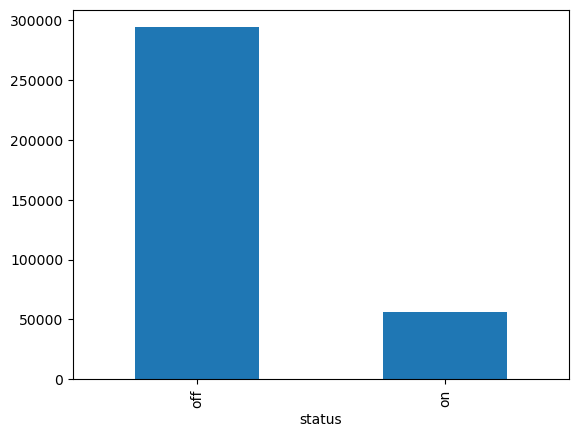

In [10]:
df[df['device_type']=='air_conditioner']['status'].value_counts().plot(kind='bar')

The air conditioner was selected for rolling-window analysis due to its highly imbalanced ON/OFF usage pattern. Unlike continuously operating appliances such as fridge, AC consumption is intermittent and season-driven, making it more sensitive to temporal smoothing choices. Analyzing the AC allowed us to identify rolling average windows that capture meaningful short-term activity while preserving long-term usage patterns, which informed the final selection of MA features.

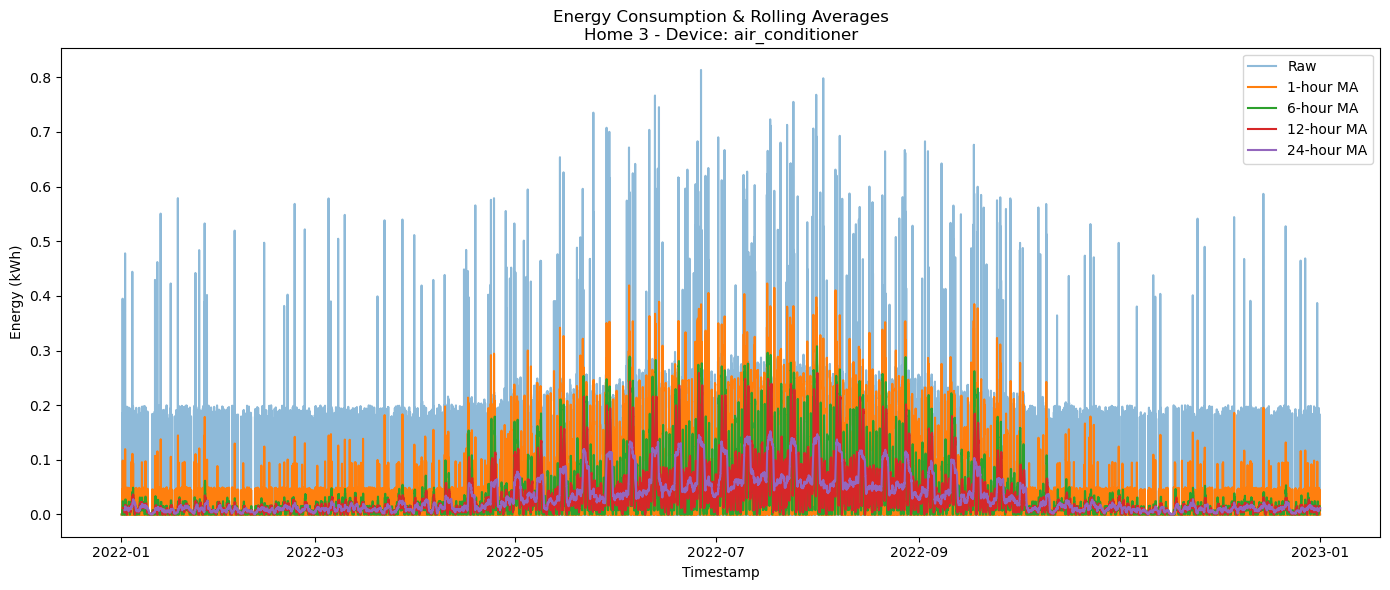

In [11]:
def plot_rolling_averages_per_house_device(df, home_id, device_type):
    """
    Plots raw energy consumption and rolling averages for a specific home/device.
    """
    # Filter for specific home and device
    data = df[(df['home_id'] == home_id) & (df['device_type'] == device_type)].copy()
    
    plt.figure(figsize=(14,6))
    plt.plot(data['timestamp'], data['energy_kWh'], label='Raw', alpha=0.5)
    plt.plot(data['timestamp'], data['energy_roll_mean_1hr'], label='1-hour MA')
    plt.plot(data['timestamp'], data['energy_roll_mean_6hr'], label='6-hour MA')
    plt.plot(data['timestamp'], data['energy_roll_mean_12hr'], label='12-hour MA')
    plt.plot(data['timestamp'], data['energy_roll_mean_24hr'], label='24-hour MA')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Energy (kWh)')
    plt.title(f'Energy Consumption & Rolling Averages\nHome {home_id} - Device: {device_type}')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_rolling_averages_per_house_device(df, home_id=3, device_type='air_conditioner')

In [12]:
df.drop('energy_roll_mean_6hr', axis=1, inplace=True)

#### Although multiple rolling averages were initially generated, exploratory analysis showed that the 6-hour moving average was highly correlated with the 12-hour window and did not contribute additional temporal information. It was therefore removed to reduce redundancy and improve model interpretability.
#### Keeping overlapping rolling windows can introduce multicollinearity in regression models, which affects coefficient stability without improving predictive power.

In [13]:
df.columns

Index(['home_id', 'timestamp', 'device_type', 'room', 'status', 'power_watt',
       'user_present', 'activity', 'indoor_temp', 'outdoor_temp', 'humidity',
       'light_level', 'month_of_year', 'day_of_week', 'hour_of_day',
       'energy_kWh', 'energy_lag_1H', 'energy_lag_1D', 'energy_lag_1W',
       'energy_roll_mean_1hr', 'energy_roll_mean_12hr',
       'energy_roll_mean_24hr'],
      dtype='object')

In [14]:
##### adding columns such as: is_weekend, etc
weekends = (5, 6, 7)
df['is_weekend'] = (df['day_of_week'].isin(weekends))
col = df.pop('is_weekend')
df.insert(len(df.columns) - 10,'is_weekend', col)

In [15]:
df[['day_of_week', 'is_weekend']]

,day_of_week,is_weekend
0,5,True
1,5,True
2,5,True
3,5,True
4,5,True
...,...,...
1751995,5,True
1751996,5,True
1751997,5,True
1751998,5,True


In [16]:
df.columns

Index(['home_id', 'timestamp', 'device_type', 'room', 'status', 'power_watt',
       'user_present', 'activity', 'indoor_temp', 'outdoor_temp', 'humidity',
       'light_level', 'is_weekend', 'month_of_year', 'day_of_week',
       'hour_of_day', 'energy_kWh', 'energy_lag_1H', 'energy_lag_1D',
       'energy_lag_1W', 'energy_roll_mean_1hr', 'energy_roll_mean_12hr',
       'energy_roll_mean_24hr'],
      dtype='object')

1. Device & Household Context

"`home_id, device_type, room, status, power_watt, user_present, activity`"
Captures household and device-specific behavior affecting energy consumption.

2. Environmental Features

"`indoor_temp, outdoor_temp, humidity, light_level`"
Represents conditions that influence device usage patterns.

3. Temporal Features

"`month_of_year, day_of_week, is_weekend, hour_of_day`"
Encodes seasonal, weekly, weekend, and intra-day trends.

4. Lag Features

"`energy_lag_1H, energy_lag_1D, energy_lag_1W`"
Captures short-term, daily, and weekly consumption dependencies.

5. Rolling Averages

"`energy_roll_mean_1hr, energy_roll_mean_12hr, energy_roll_mean_24hr`"
Smooths fluctuations and models intra-day and daily trends at multiple scales.

Target:
`energy_kWh`

Notes:
- timestamp is not used as an index due to repeated timestamps across homes/devices.
- All lag and rolling features are computed per device and per home to avoid leakage.

### Group energy consumption by time units (hour, day, week, month)

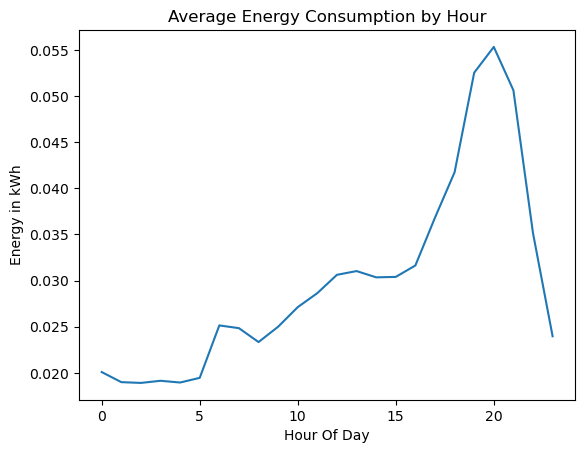

In [17]:
df.groupby(df['timestamp'].dt.hour)['energy_kWh'].mean().plot(title='Average Energy Consumption by Hour')
plt.xlabel('Hour Of Day') 
plt.ylabel('Energy in kWh') 
plt.savefig(FIG_PATH+'\Energy_AVG_Hourly.png')
plt.show()

<Axes: title={'center': 'Daily Energy Consumption'}, xlabel='timestamp'>

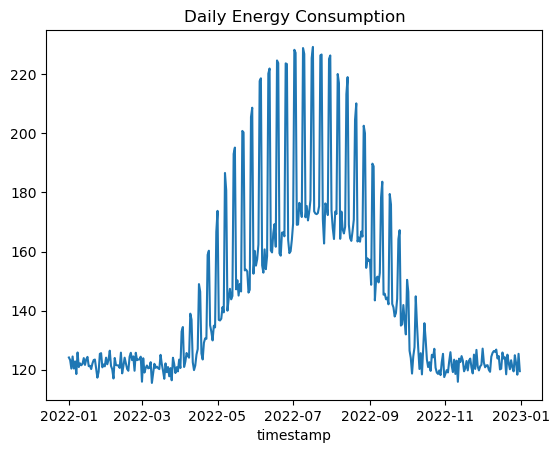

In [18]:
df.groupby(df['timestamp'].dt.date)['energy_kWh'].sum().plot(title='Daily Energy Consumption')

The series exhibits seasonal behavior with a non-stationary trend (multiplicative seasonality) and heteroscedastic variance

<Axes: title={'center': 'Average Energy Consumption by Day of Month'}, xlabel='timestamp'>

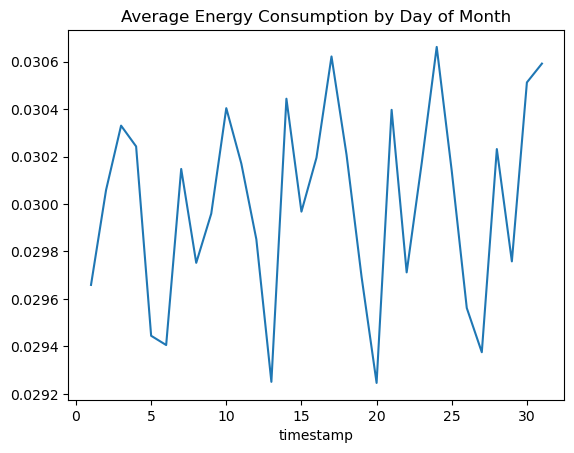

In [19]:
df.groupby(df['timestamp'].dt.day)['energy_kWh'].mean().plot(title='Average Energy Consumption by Day of Month')

Consumption behavior is consistent across days with minor variations, indicating structured usage patterns rather than noise.

<Axes: title={'center': 'Weekly Energy Consumption'}, xlabel='week'>

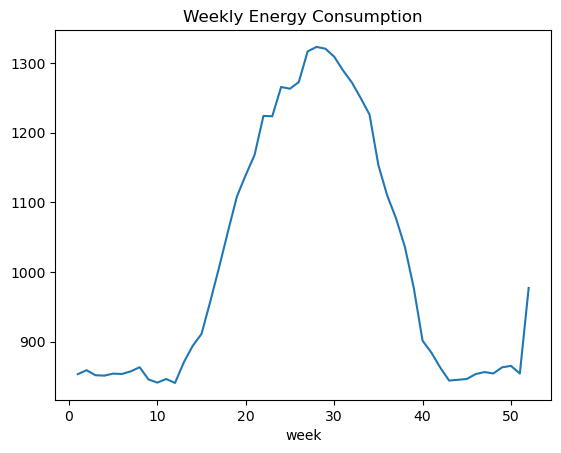

In [20]:
df.groupby(df['timestamp'].dt.isocalendar().week)['energy_kWh'].sum().plot(title='Weekly Energy Consumption')

<Axes: title={'center': 'Monthly Energy Consumption'}, xlabel='timestamp'>

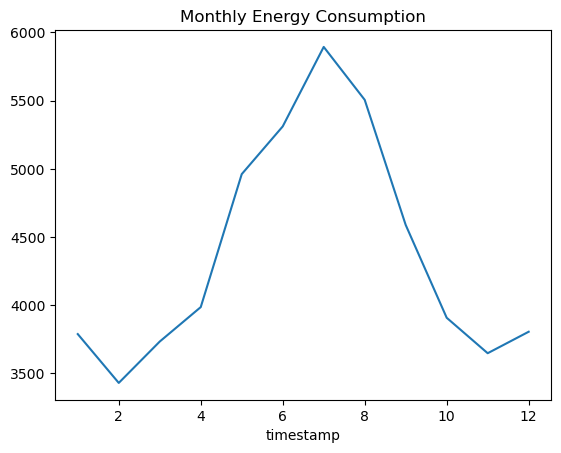

In [21]:
df.groupby(df['timestamp'].dt.month)['energy_kWh'].sum().plot(title='Monthly Energy Consumption')

##### These plots highlight clear temporal patterns in energy consumption. The daily time-series reveals strong seasonal behavior across the year, while aggregated views confirm consistent usage cycles.

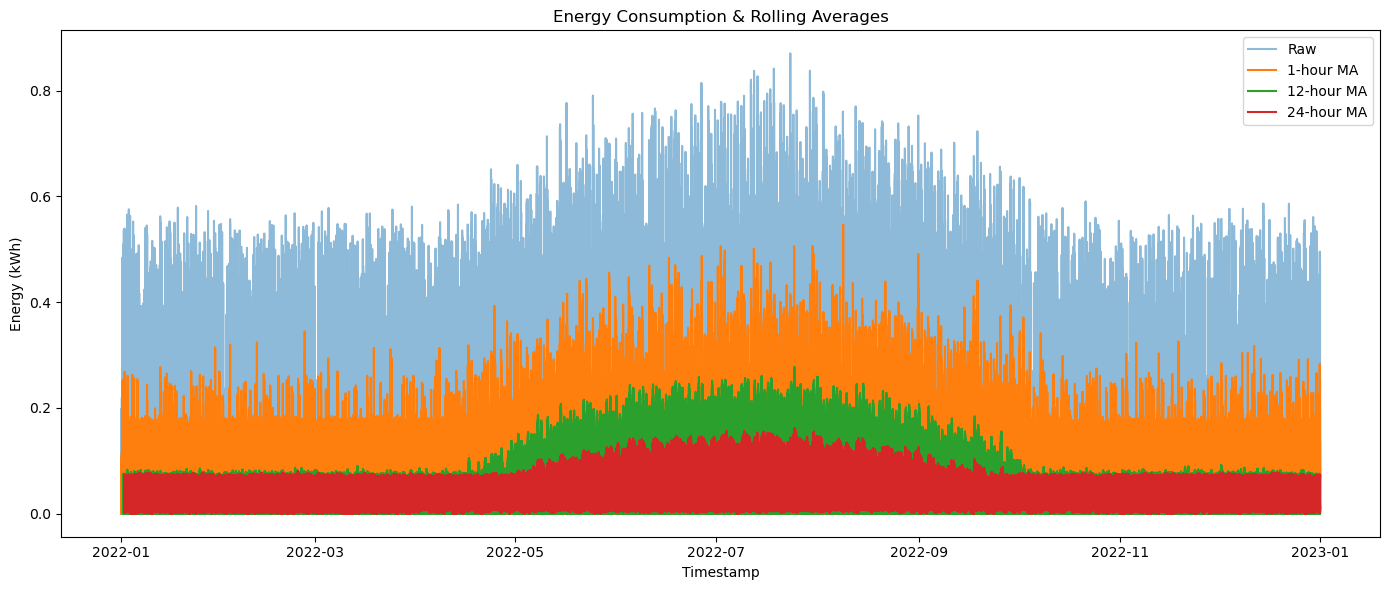

In [22]:
def plot_rolling_averages(df):
    """
    Plots raw energy consumption and rolling averages.
    """
    # Filter the required columns
    data = df[['timestamp', 'energy_kWh', 'energy_roll_mean_1hr', 'energy_roll_mean_12hr', 'energy_roll_mean_24hr']].copy()
    
    plt.figure(figsize=(14,6))
    plt.plot(data['timestamp'], data['energy_kWh'], label='Raw', alpha=0.5)
    plt.plot(data['timestamp'], data['energy_roll_mean_1hr'], label='1-hour MA')
    plt.plot(data['timestamp'], data['energy_roll_mean_12hr'], label='12-hour MA')
    plt.plot(data['timestamp'], data['energy_roll_mean_24hr'], label='24-hour MA')
    
    plt.xlabel('Timestamp')
    plt.ylabel('Energy (kWh)')
    plt.title(f'Energy Consumption & Rolling Averages')
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

plot_rolling_averages(df)